# Сборный проект №1

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откроем файл с данными и изучим общую информацию

Импортируем библиотеки:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Сохраним файл в переменную data и выведем его на экран и применим функцию info

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(15))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В данных видим буквы в верхнем регисте в названии столбцов, следует переименовать их и превести к нижнему регистру. Всего в датафрейме 11 колонок и 16715 строк. Присутствуют пропуски в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Столбец "год релиза" тип данных float, следует перевести его в формат int. 

# Шаг 2. Предобработка данных
**2.1.** Заменим названия столбцов (приведем к нижнему регистру)

In [3]:
data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [4]:
data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
                       'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                       'Other_sales':'other_sales', 'Critic_Score':'critic_score',
                       'User_Score':'user_score', 'Rating':'rating'}, inplace = True)

**2.2.** В столбце `'year_of_release'` присутствуют пропуски, которые сведетельствуют о том что игра не вышла в релиз. Для таких игр заменим дату на `2050`, затем переведем данные столбца к целочисленным. 

In [5]:
print('Пропуски составляют', data['year_of_release'].isna().sum()/len(data)*100, 'процентов от всего датафрейма')

data['year_of_release'] = data['year_of_release'].fillna(2050)
data['year_of_release'] = data['year_of_release'].astype('int')

data[data['year_of_release'].isna()].sort_values(by='name')

Пропуски составляют 1.609332934489979 процентов от всего датафрейма


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**2.3.** Предобработка в столбце `'name'`, видим что пропуски скорее всего связанны с отсутствием данных об играх. Платформа GEN это скорее всего сокращение от Sega genesis, сега прекратила потдержку этой платформы в 1999 году. Не самая популярная платформа для который вышли две далеко не самые популярные игры, тем не мение в данных есть информация о релизе этих игр и продажах. Данные не значительные, стоит их удалить, на конечный результат это не повлияет.

In [6]:
display(data.loc[data['name'].isna()])
data.dropna(subset=['name'], axis=0, inplace = True)
data['name'] = data['name'].str.lower()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**2.4.** Предобработка в столбце `'platform'`

In [7]:
print(data.platform.unique())
data['platform'] = data['platform'].str.lower()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**2.5.** Предобработка в столбце `'critic_score'` есть пропущенные значения, скорее всего они появились из-за отсутствия данных в связи с ранним выходом игры в свет, для таких игр заменим значиния на -1 

In [8]:
print(data['critic_score'].unique())
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype('int')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


**2.6.** Предобработка в `'user_score'` в данных содержатся строки с оценками типа 'tbd' - это обривиатура от английского to be decided или to be defined. Это значит что недостаточно пользователей поставило игре оценку, чтобы рассчитывать усреднённую. Чтобы перевести столбец в числовой формат, приравняем это к пропуску, а затем заменим пропуски на -1. Также будет проще сравнивать оценки, если они будут одного типа, поэтому пользовательские умножим на 10, чтобы использовать 100-балльную систему.

In [9]:
print(data['user_score'].unique())
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].fillna(-1)
data['user_score']=data['user_score'].astype('float')
data['user_score']=data['user_score']*10
data['user_score'] = data['user_score'].astype('int')

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**2.7.** Предобработка в столбце `'genre'` 

In [10]:
print(data['genre'].unique())
print(data['genre'].isna().sum())
data['genre'] = data['genre'].str.lower()

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
0


**2.8.** Предобработка в столбце `'rating'` пропуски присутствуют в разных играх для разных годов выпуска и платформ, по большей части рейтинг отсутствует у игр которые имеют очень скромные продажи, установим для таких игр свой рейтинг "out of rating"

In [11]:
print(data['rating'].unique())
print(data['rating'].isna().sum())
data[data['rating'].isna()].sort_values(by='name')
data['rating'] = data['rating'].fillna('out of rating')
data['rating'] = data['rating'].str.lower()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
6764


**2.9.** Выполним поиск явных дубликатов

In [12]:
data.duplicated().sum()
# дубликатов в данных не обнаружено

0

**2.10.** Добавим столбец с общими продажами по всем регионам

In [13]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [14]:
display(data.head(15))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-10,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-10,out of rating,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-10,out of rating,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-10,out of rating,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.7+ MB


# Шаг 3. Проведем исследовательский анализ данных

**3.1.** Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [15]:
releases = data.groupby('year_of_release')[['name']].count()
releases = releases.iloc[:-1]
display(releases)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


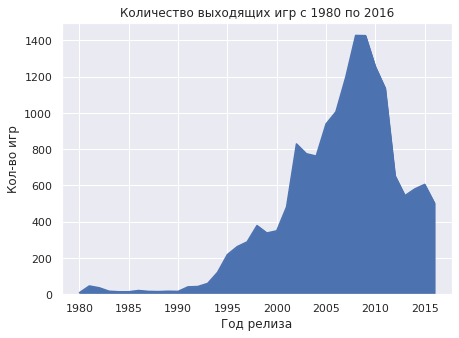

In [16]:
sns.set(rc={'figure.figsize':(7,5)})
releases.plot.area(legend = None)
plt.title('Количество выходящих игр с 1980 по 2016')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.legend
plt.show()

**Вывод:** Начиная с 1994 года в игровой индустрии начался бурный рост. С ростом распростронения домашнего компьютерного оборудования стал рости и рынок компьютерных игр. Бурный всплеск закончился в 2012 году, связанно это с несколькими факторами: рост числа конкурентов на рынке, повышенное требование к качеству конечного продукта, кризис 2008 года, рост популярности смартфонов как игровой платформы.

Для того чтобы дать верный прогноз на 2017 год нам следует опираться на данные из 2012 - 2016 годов.

**3.2.** Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы?

In [17]:
top_platforms = data.groupby('platform')[['total_sales']].sum()
top_platforms = top_platforms.sort_values(by='total_sales',ascending = False)
top_five_platforms = top_platforms.head(5)
display(top_five_platforms)

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


In [18]:
# словарь с платформами с найбольшими продажами
dict_platforms = top_five_platforms.reset_index()['platform']
dict_platforms

0     ps2
1    x360
2     ps3
3     wii
4      ds
Name: platform, dtype: object

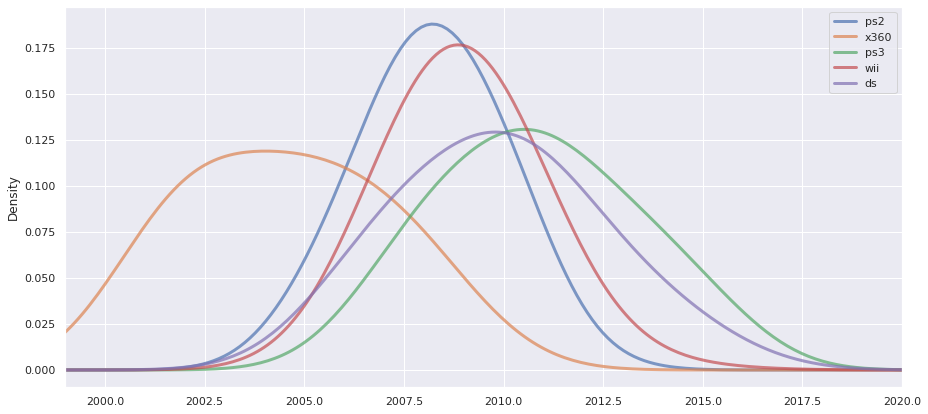

In [19]:
# срез данных по словарью с большем количкство продаж и его групировка по платформам
platforms = data.query('platform in @top_five_platforms.index')[['year_of_release', 'platform']].groupby('platform')

# построение плотностей частоты для платформ с большем количеством сумарными продажами
for platform, platforms_df in platforms:
    subset = platforms.get_group(platform) 
    subset['year_of_release'].plot(kind='density', grid=True, figsize=(15,7),
                                    linewidth=3, alpha=0.7, xlim=(1999, 2020), legend=True,)
    plt.legend(dict_platforms)

In [20]:
# найдём платформы, на которые выпускались игры в 2016 году
cur_platforms = data.loc[data['year_of_release'] == 2016, 'platform'].unique()
print('Актуальные платформы на 2016 год:', cur_platforms)

cur_platforms = data.query('platform in @cur_platforms and year_of_release == 2016')
cur_platforms = cur_platforms.sort_values(by='total_sales',ascending = False)
cur_platforms = cur_platforms.groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending = False)

cur_platforms_five = cur_platforms.head(5)
display(cur_platforms_five)

Актуальные платформы на 2016 год: ['ps4' '3ds' 'xone' 'wiiu' 'ps3' 'pc' 'x360' 'psv' 'wii']


,total_sales
platform,
ps4,69.25
xone,26.15
3ds,15.14
pc,5.25
wiiu,4.60


In [21]:
dict_cur_platforms = cur_platforms_five.reset_index()['platform']
dict_cur_platforms

0     ps4
1    xone
2     3ds
3      pc
4    wiiu
Name: platform, dtype: object

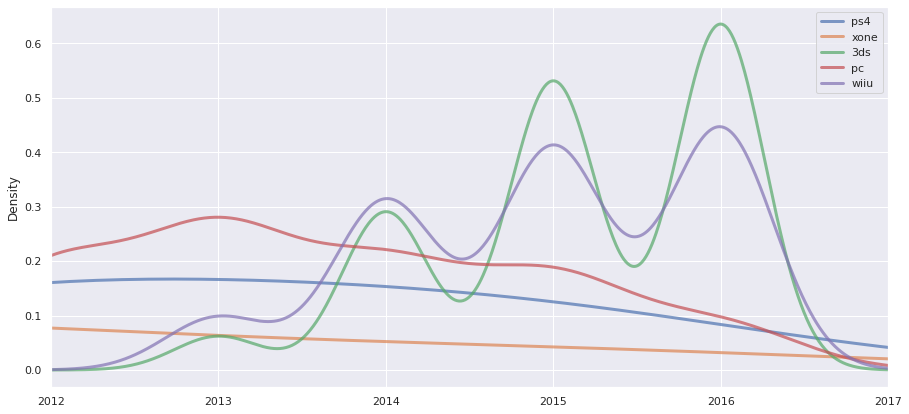

In [22]:
# срез данных по словарью с большем количкство продаж и его групировка по платформам
platforms = data.query('platform in @cur_platforms_five.index')[['year_of_release', 'platform']].groupby('platform')

# построение плотностей частоты для платформ с большем количеством сумарными продажами
for platform, platforms_df in platforms:
    subset = platforms.get_group(platform) 
    subset['year_of_release'].plot(kind='density', grid=True, figsize=(15,7),
                                    linewidth=3, alpha=0.7, xlim=(2012, 2017), legend=True,)
    plt.legend(dict_cur_platforms)

**Вывод:** Из графиков плотностей платформ с наиболшими сумарными продажами можно определить что жизненые цикл каждой платформы составляет около 10 лет. Исходя из данного вывода можно определить что актуальный период анализа для прогнозирование на 2017 год целособрасно определить период из 2012 г, для того чтобы нагладнее посмотреть на динамику продаж.

Потенциально прибыльные платформы на конец 2016 года:

* PS4
* Xone

**3.3.** Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [23]:
# срезаем данных актульного периода.
actual_period = data.query('year_of_release > 2012')
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,81,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-10,out of rating,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-10,out of rating,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62


**3.4.** Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [24]:
# платформы лидирующие по продажам
lider_platform = actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
lider_platform = lider_platform.head(5)
lider_platform

platform
ps4     314.14
ps3     189.74
xone    159.32
x360    146.98
3ds     144.44
Name: total_sales, dtype: float64

In [25]:
# динамика продаж актуальных платформ
actual_period = actual_period.query('year_of_release < 2050')
dinamics_lider_platform = actual_period.groupby(['platform' , 'year_of_release'])['total_sales'].sum()
# добавим фильтрацию по году вывода платформ 
dinamics_lider_platform

platform  year_of_release
3ds       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
ds        2013                 1.54
pc        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
ps3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
ps4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
psp       2013                 3.14
          2014                 0.24
          2015                 0.12
psv       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [26]:
# словарь лидирующих платформ за актуальный переод
dict_platforms = lider_platform.reset_index().platform
dict_platforms

0     ps4
1     ps3
2    xone
3    x360
4     3ds
Name: platform, dtype: object

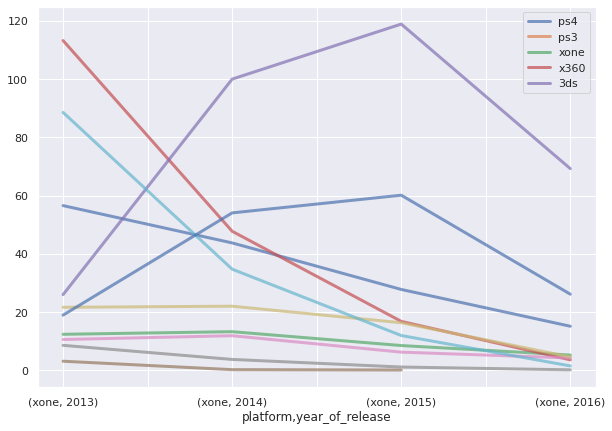

In [27]:
# групировка по платформам 
dinamics = dinamics_lider_platform.groupby('platform')

# построение графиков суммарных продаж по платформам 
for platform, purchase_df in dinamics:
    subset = dinamics.get_group(platform) 
    subset.plot(x='year_of_release', y='total_sales', kind='line', grid=True, figsize=(10,7),
                                    linewidth=3, alpha=0.7, legend=True,)
    plt.legend(dict_platforms)

In [28]:
# cловарь с платформами со найлучгими продажами
dict_boxplot = lider_platform.reset_index()['platform'][0:5]
dict_boxplot

# cрез данных с перспектывними платформами с 2012 года до 2016
perspective_platforms = actual_period.query('platform in @dict_boxplot').reset_index()
perspective_platforms.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,m,21.05
1,23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,81,m,16.27
2,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-10,out of rating,14.63
3,33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-10,out of rating,14.60
4,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62


**3.5.** Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 2.0)

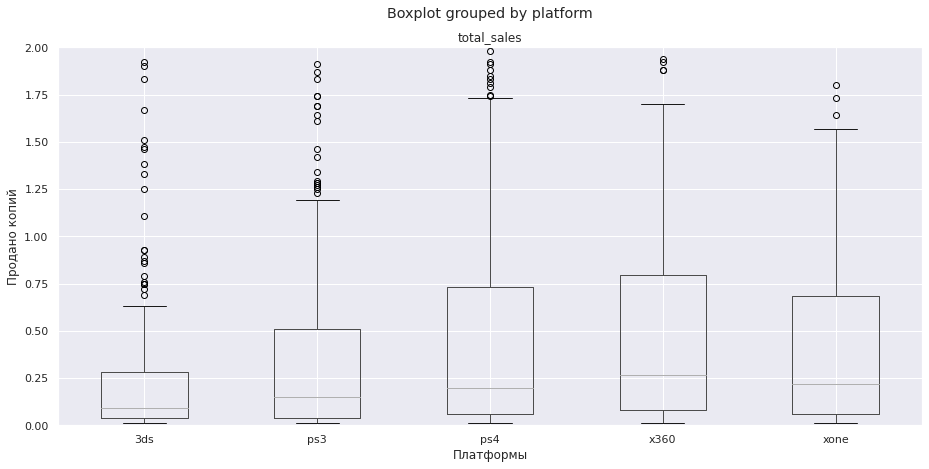

In [29]:
perspective_platforms.boxplot(column="total_sales", by="platform", figsize = (15,7))
plt.xlabel('Платформы')
plt.ylabel('Продано копий')
plt.ylim(0,2)

**Вывод:** График свидетельствует о том что медианные значения у всех платформ отличаются не сильно, это говорит о высокой конкуренции среди популярных игровых консолей.

**3.6.** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

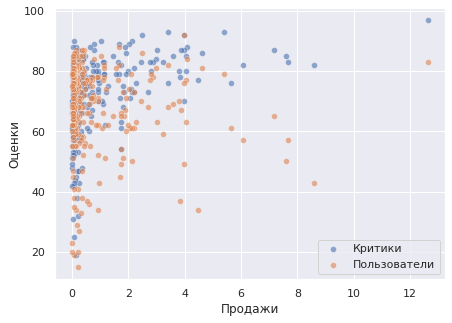

In [30]:
# диаграмма рассеяния продаж от отзывов пользователей 

ps4_df = data.query('platform == "ps4" and critic_score>0 and user_score>0')

sns.scatterplot(data=ps4_df, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=ps4_df, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

Посмотрим кореляцию продаж от оценок пользователей и критиков

In [31]:
ps4_df[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


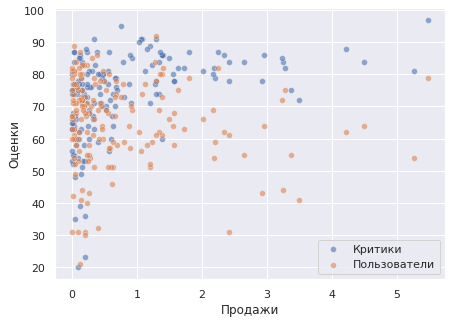

In [32]:
# диаграмма рассеяния продаж от отзывов пользователей 

xone = data.query('platform == "xone" and critic_score>0 and user_score>0')

sns.scatterplot(data=xone, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=xone, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [33]:
xone[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


**Вывод:** Пографику мы видим что чем выше оценки критиков и пользователей к игре тем выше колличество продаж. Самые продоваемые игры имеют оценку от 60 баллов и выше. Пользователи чаще ставят низкие оценки для игр так как они не предвзяты, в свою очередь критики чаще склонны ставить высокую оценку. Скорее всего это связанно с тем что критики не могут себе позволить ставить низкие оценки так как рецензия на игру это своего рода реклама а соответственно и продвижение игры на рынке. Видим что коэффициент корреляции между оценками пользователей и критиков меньше для хитовых игр.

**3.7.** Посмотрим на общее распределение игр по жанрам.

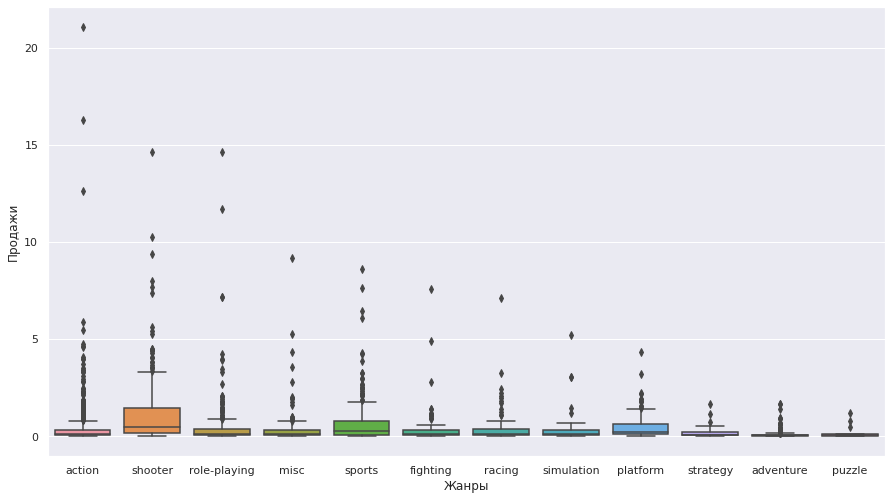

In [34]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(data=actual_period, x='genre', y='total_sales')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Главные суперхиты с продажами более 10 млн копий принадлежат жанрам экшн, рпг, шутер и гонки, и два в жанровые рамки не уложились. Посмотрим на картину без выбросов

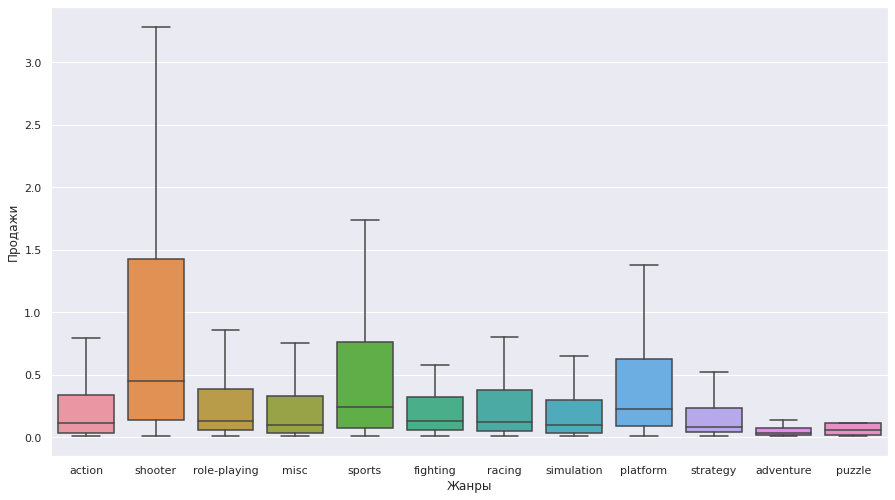

In [35]:
sns.boxplot(data=actual_period, x='genre', y='total_sales', showfliers=False)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

**Вывод:** Шутеры выглядят надёжнее всего с точки зрения продаж - выше медианное значение достаточно часто "выстреливают" хитами, как показал график выше. Также стоит обратить внимание на платформеры, спортивные игры, гонки, ролевые игры, экшны и файтинги. Симуляторы, стратегии, головоломки и приключенческие игры (скорее всего сюда попали квесты) являются более нишевыми жанрами и не столь популярны.

# Шаг 4. Составим портрет пользователя каждого региона

**4.1.** Самые популярные платформы (топ-5). 

In [36]:
# построем свобную таблицу по платформам и продажам
rating_region = actual_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'],
                                          aggfunc='sum')
rating_region.head()

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
3ds,30.96,67.81,38.20,143.25
ds,0.85,0.00,0.57,1.54
pc,25.36,0.00,11.11,39.43
ps3,67.81,23.35,63.50,181.43
ps4,141.09,15.96,108.74,314.14


In [37]:
# добавляем столбцы с долями продажи 
rating_region['na_ratio'] = rating_region.na_sales / rating_region.total_sales
rating_region['eu_ratio'] = rating_region.eu_sales / rating_region.total_sales
rating_region['jp_ratio'] = rating_region.jp_sales / rating_region.total_sales

rating_region.head()

,eu_sales,jp_sales,na_sales,total_sales,na_ratio,eu_ratio,jp_ratio
platform,,,,,,,
3ds,30.96,67.81,38.20,143.25,0.266667,0.216126,0.473368
ds,0.85,0.00,0.57,1.54,0.370130,0.551948,0.000000
pc,25.36,0.00,11.11,39.43,0.281765,0.643165,0.000000
ps3,67.81,23.35,63.50,181.43,0.349997,0.373753,0.128700
ps4,141.09,15.96,108.74,314.14,0.346151,0.449131,0.050805


In [38]:
# выводим топ 5 платформы по регионам
rating_eu = rating_region[['eu_sales', 'eu_ratio']].sort_values(ascending = False,by = 'eu_sales').head()
rating_jp = rating_region[['jp_sales', 'jp_ratio']].sort_values(ascending = False,by = 'jp_sales').head()
rating_na = rating_region[['na_sales', 'na_ratio']].sort_values(ascending = False,by = 'na_sales').head()

display(rating_eu)
display(rating_jp)
display(rating_na)

,eu_sales,eu_ratio
platform,,
ps4,141.09,0.449131
ps3,67.81,0.373753
xone,51.59,0.323814
x360,42.52,0.310819
3ds,30.96,0.216126


,jp_sales,jp_ratio
platform,,
3ds,67.81,0.473368
ps3,23.35,0.128700
psv,18.59,0.563504
ps4,15.96,0.050805
wiiu,10.88,0.168343


,na_sales,na_ratio
platform,,
ps4,108.74,0.346151
xone,93.12,0.584484
x360,81.66,0.596930
ps3,63.50,0.349997
3ds,38.20,0.266667


**Вывод:** Из полученых результатов можно сделать вывод что регион Европа и Сверная Америка популяоными платформами являются PS2, PS3 X360 и Wii. Доля продаж в Северной Америке больше чем в Европе, то что говорит о масштабе рынка Северной Америки. В Японии совершено иная картина популярных платформ а их доля рынка меньше чем в другиз регионах.

**4.2.** Самые популярные жанры (топ-5).

In [39]:
# cводная таблица по жанрам и и продажам.
purchase_genres = actual_period.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], 
                                                        aggfunc=('sum'))
display(purchase_genres)

eu_sales_genre = purchase_genres[['eu_sales']].sort_values(ascending = False,by = 'eu_sales').head()
jp_sales_genre = purchase_genres[['jp_sales']].sort_values(ascending = False,by = 'jp_sales').head()    
na_sales_genre = purchase_genres[['na_sales']].sort_values(ascending = False,by = 'na_sales').head() 

,eu_sales,jp_sales,na_sales
genre,,,
action,118.13,40.49,126.05
adventure,8.25,5.82,7.14
fighting,8.55,7.65,15.55
misc,20.04,9.20,27.49
platform,15.58,4.79,18.14
puzzle,1.00,1.18,0.83
racing,20.19,2.30,12.96
role-playing,36.97,51.04,46.40
shooter,87.86,6.61,109.74


In [40]:
# выведим топ 5 по регионам.
for i in purchase_genres:
    subset = purchase_genres.reset_index()[['genre', i]].sort_values(by=i, ascending=False).head()
    display(subset)

,genre,eu_sales
0,action,118.13
8,shooter,87.86
10,sports,60.52
7,role-playing,36.97
6,racing,20.19


,genre,jp_sales
7,role-playing,51.04
0,action,40.49
3,misc,9.20
2,fighting,7.65
8,shooter,6.61


,genre,na_sales
0,action,126.05
8,shooter,109.74
10,sports,65.27
7,role-playing,46.40
3,misc,27.49


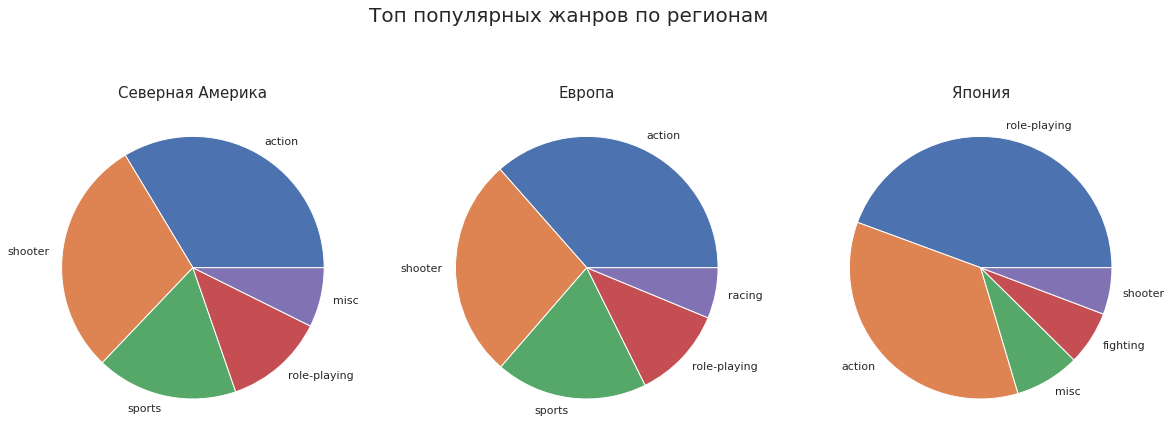

In [41]:
# Визуализируем распределение популярных жанров pie.
fig = plt.figure(figsize=(20,7))
fig.suptitle('Топ популярных жанров по регионам', fontsize=20, y=1.02)
ax1 = plt.subplot(131)

# построим quantile-quantile plots методом probplot() из библиотеки stats для обеих выборок
plt.pie(na_sales_genre['na_sales'], labels=na_sales_genre.index)
ax1.set_title('Северная Америка', fontsize=15)

ax2 = plt.subplot(132)
plt.pie(eu_sales_genre['eu_sales'], labels=eu_sales_genre.index)
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
plt.pie(jp_sales_genre['jp_sales'], labels=jp_sales_genre.index)
ax3.set_title('Япония', fontsize=15)
plt.show()

**Вывод:** В регион Северной Америки и Европы популярные жанры одинаковый. В регион Япония входят другой жанр как Fighting , и порядок популярности другой, а именно жанр Role Playing занимает первое место.

**4.3.** Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [42]:
ersb = actual_period.groupby('rating')['eu_sales', 'jp_sales', 'na_sales', 'total_sales'].sum()
display(ersb)

/tmp/ipykernel_48/2646270523.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ersb = actual_period.groupby('rating')['eu_sales', 'jp_sales', 'na_sales', 'total_sales'].sum()


,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
e,83.36,15.14,79.05,200.16
e10+,42.69,5.89,54.24,115.39
m,145.32,14.11,165.21,371.68
out of rating,78.91,85.05,89.42,276.84
t,41.95,20.59,49.79,126.62


**Вывод:** рейтинг ESRB влияет на продажи, наиболее предпочтительный рейтинг для прогноза на 2017 год 'M', общие продажи с этим рейтингом доминируют в европейском и северо-американском регионах. Японский рынок меньше по сравнению с европейским и американским и довольно специфический; при работе на нём нужно выстраивать отдельную стратегию.

# Шаг 5. Проверка гипотез.

**5.1.** Гипотиза 1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H0 должна предполагать равенство между выборками, соответственно гипотеза H1 должна говорить об обратном

Нулевая гипотеза: средние пользовательские рейтинги равны для PC и XBox One
Альтернативная: средние пользовательские рейтинги для данных платформ не равны

In [43]:
xone_score = actual_period.query('platform == "xone" and user_score > 0')['user_score']
pc_score = actual_period.query('platform == "pc" and user_score > 0')['user_score']

st.ttest_ind(xone_score, pc_score, equal_var = True)

Ttest_indResult(statistic=1.4788255981357248, pvalue=0.14012658403611722)

In [44]:
xone_score = actual_period.query('platform == "xone" and user_score > 0')['user_score']
pc_score = actual_period.query('platform == "pc" and user_score > 0')['user_score']

alpha = 0.05

# Проверим гипотезу о равенстве средних двух независимых совокупностей
results_1 = st.ttest_ind(
    xone_score, 
    pc_score, equal_var = True)

# выведим на экран получившееся p-значени
print('p-значение:', results_1.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611722
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза проверяна

**5.2.** Гипотиза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая H0 гипотеза буедт такой: средние пользовательские оценки для жанров Action и Sports равны


H1 гипотеза - средние пользовательские оценки для жанров Action и Sports не равны.

In [45]:
action_score = actual_period.query('genre == "action" and user_score > 0')['user_score']
sports_score = actual_period.query('genre == "sports" and user_score > 0')['user_score']

alpha = 0.05

# Проверим гипотезу о равенстве средних двух независимых совокупностей
results_1 = st.ttest_ind(
    action_score, 
    sports_score
)

# выведим на экран получившееся p-значени
print('p-значение:', results_1.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140778e-27
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу поскольку с вероятностью 1,31 что средные значения одинаковые. То есть она очень близко к нулю.

# Шаг 6. Общий вывод

* Открыл файл CSV сохранил его в пременную data и вывел на экран, данные соответствовали названию. 
* В предобработке обнаружил что не все столбцы соответствовали своим типам даннах, изменил их тип и по возможности устранил пропуски там где это было возможно.
* Проводя иследовательский анализ данных заметил что начиная с 1994 года в игровой индустрии начался бурный рост. Бурный всплеск закончился в 2012 году, связанно это с несколькими факторами: рост числа конкурентов на рынке, повышенное требование к качеству конечного продукта и рост популярности смартфонов как игровой платформы. Выяснил что жизненый цикл каждой платформы составляет около 10 лет.
* На актуальный момент времени (2016) год я выяснил что наиболее популярной консолью является xone, ps4 и 3ds для японского рынка, а актуальными жанрами являются action и shooter.
* Поведения потребления отличается между пользователей Японии и пользователей Северной аиерики и Европы.Это касается предпочитения по платформам и по жнрам . Так же райтинг ESBS не сушествено влияет на продажи.
* Отзывы от пользователей ни имеют корреляцю с продажами. Но отзывы оот критикрв имеют коэффициент корелляци около 0,40 то что означает что их вдияние на продажи присутсвует.
* Выдвинулось гипотезы о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковыею После статестической проверки не получилочт отвергать эту гипотезу.
* Вторая гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. Мы получили что эти значения могут быть одинаковые, то есть с вероятностью очень близко к нулию, что позволяет сказать что предложеная гипотеза разное.

Я бы рекомендовал интернет магазину в 2017 году сделать ставку на игры в жанре шутер и экшен с большим жизненным циклом и получением издателем выручки напрямую от игрока при помощи донатов, на современном рынке такие игры имеют наибольшую популярность. Особое внимание следует уделить играм жанров: Shooter, Action, Sports, Roleplaying а так же внежанровых-misc.
Рынок Японии стоит особняком - там лидируют портативные консоли, в частности 3ds, и пользователи предпочитают Roleplaying игры